## Assignment is below at the bottom

Video 13.1
https://www.youtube.com/watch?v=kIGHE7Cfe1s

Video 13.2
https://www.youtube.com/watch?v=Rm9bJcDd1KU

Video 13.3
https://youtu.be/6HjZk-3LsjE

In [21]:
from keras.callbacks import TensorBoard
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

xtrain = xtrain.astype('float32') / 255.
xtest = xtest.astype('float32') / 255.
xtrain = xtrain.reshape((len(xtrain), np.prod(xtrain.shape[1:])))
xtest = xtest.reshape((len(xtest), np.prod(xtest.shape[1:])))
xtrain.shape, xtest.shape


((60000, 784), (10000, 784))

In [22]:
# this is the size of our encoded representations
encoding_dim = 4  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
x = input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)


# "decoded" is the lossy reconstruction of the input
x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

# create the decoder model
decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))


In [23]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [24]:
autoencoder.fit(xtrain, xtrain,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(xtest, xtest),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])


Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3231 - val_loss: 0.1884
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1830 - val_loss: 0.1725
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1715 - val_loss: 0.1667
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1656 - val_loss: 0.1624
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1621 - val_loss: 0.1594
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1593 - val_loss: 0.1578
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1574 - val_loss: 0.1561
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1559 - val_loss: 0.1549
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1543 - val_loss: 0.1538
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1533 - val_loss: 0.1526
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1521 - val_loss: 0.1516
Epoch 12/100
235/235 ━━━━━━━━━━━━━━━━━━━━

In [28]:
encoded_imgs


array([[ 4.4641128, 19.564646 , 18.71568  , 29.751331 ],
       [20.201181 ,  6.012961 , 14.759459 , 28.359528 ],
       [26.176735 , 24.066814 , 36.37442  , 43.28456  ],
       ...,
       [10.040821 , 17.79511  , 15.901761 , 17.337416 ],
       [18.587631 , 13.839252 , 22.074814 ,  7.9462223],
       [23.045376 , 24.04064  , 13.681365 , 10.731057 ]], dtype=float32)

In [25]:
noise = np.random.normal(20,4, (4,4))
noise_preds = decoder.predict(noise)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


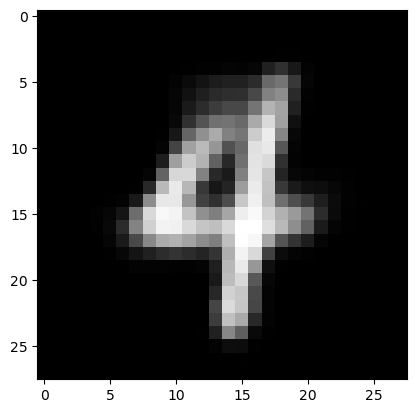

In [26]:
plt.imshow(noise_preds[1].reshape(28,28))


In [29]:
np.max(encoded_imgs)


69.500984

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 536us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step


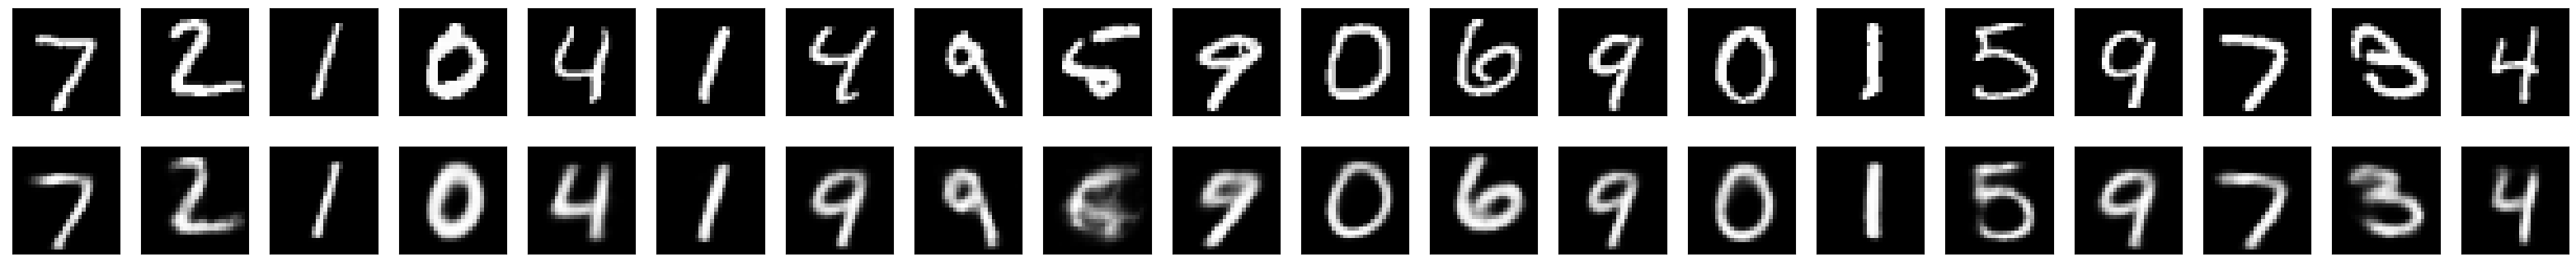

In [27]:
encoded_imgs = encoder.predict(xtest)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt

n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [30]:
encoded_imgs


array([[ 4.4641128, 19.564646 , 18.71568  , 29.751331 ],
       [20.201181 ,  6.012961 , 14.759459 , 28.359528 ],
       [26.176735 , 24.066814 , 36.37442  , 43.28456  ],
       ...,
       [10.040821 , 17.79511  , 15.901761 , 17.337416 ],
       [18.587631 , 13.839252 , 22.074814 ,  7.9462223],
       [23.045376 , 24.04064  , 13.681365 , 10.731057 ]], dtype=float32)

In [31]:
%matplotlib inline


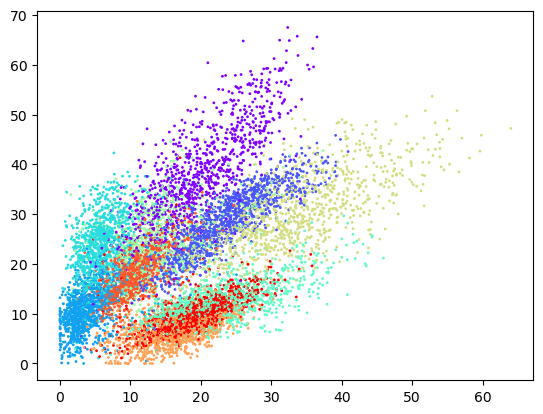

In [32]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,0], s=1, c=ytest, cmap='rainbow')
# plt.show()


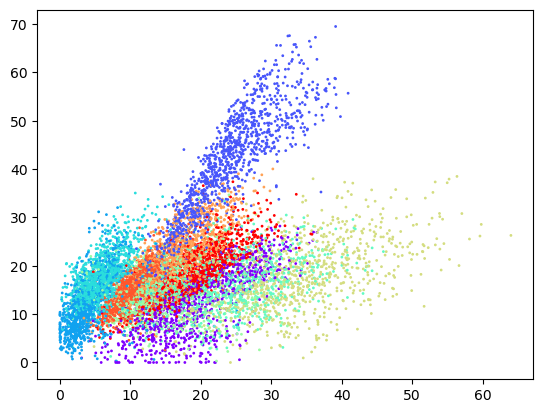

In [33]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,3], s=1, c=ytest, cmap='rainbow')
# plt.show()


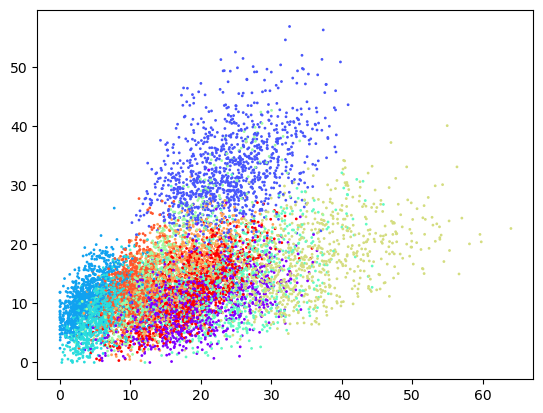

In [34]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,2], s=1, c=ytest, cmap='rainbow')
# plt.show()


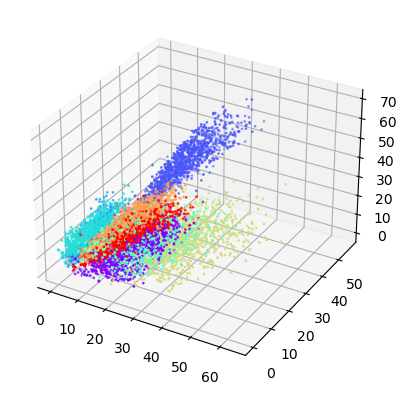

In [35]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(encoded_imgs[:,1], encoded_imgs[:,2], encoded_imgs[:,3], c=ytest, cmap='rainbow', s=1)


# Assignment


1. change the `encoding_dim` through various values (`range(2,18,2)` and save the loss you can get. Plot the 8 pairs of dimensions vs loss on a scatter plot


In [36]:
#Define loss list + parameter for encoding dimensions
losses = []
dimensions = range(2, 18, 2)

for encoding_dim in dimensions:
    #Autoencoder model
    input_img = Input(shape=(784,))
    x = Dense(256, activation='relu')(input_img)
    x = Dense(128, activation='relu')(x)
    encoded = Dense(encoding_dim, activation='relu')(x)
    x = Dense(128, activation='relu')(encoded)
    x = Dense(256, activation='relu')(x)
    decoded = Dense(784, activation='sigmoid')(x)

    #Autoencoder model maps an input to its reconstruction & encoder model reduces it
    autoencoder = Model(input_img, decoded)
    encoder = Model(input_img, encoded)

    #Placeholder for an encoded input (encoding_dim)
    encoded_input = Input(shape=(encoding_dim,))

    #Retrieve the last three layers
    dcd1 = autoencoder.layers[-1]
    dcd2 = autoencoder.layers[-2]
    dcd3 = autoencoder.layers[-3]

    #Create the decoder model using the last three layers
    decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

    #Compile & training
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    autoencoder.fit(xtrain, xtrain,
                    epochs=100,
                    batch_size=256,
                    shuffle=True,
                    validation_data=(xtest, xtest),
                    callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

    #Evaluation + store validation loss
    val_loss = autoencoder.evaluate(xtest, xtest, verbose=0)
    losses.append(val_loss)


Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3432 - val_loss: 0.2296
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2239 - val_loss: 0.2092
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2074 - val_loss: 0.2019
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2013 - val_loss: 0.1984
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1976 - val_loss: 0.1959
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1947 - val_loss: 0.1938
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1933 - val_loss: 0.1920
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1912 - val_loss: 0.1900
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1891 - val_loss: 0.1884
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1880 - val_loss: 0.1874
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1865 - val_loss: 0.1865
Epoch 12/100
235/235 ━━━━━━━━━━━━━━━━━━━━

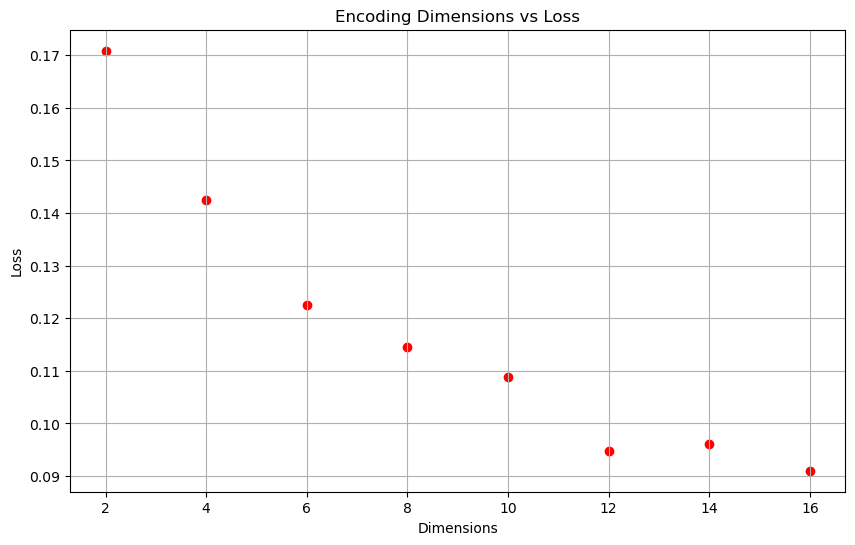

In [37]:
plt.figure(figsize=(10, 6))
plt.scatter(dimensions, losses, color='red')
plt.xlabel('Dimensions')
plt.ylabel('Loss')
plt.title('Encoding Dimensions vs Loss')
plt.grid(True)
plt.show()




2. **_After_** training an autoencoder with `encoding_dim=8`, apply noise (like the previous assignment) to *_only_* the input of the trained autoencoder (not the output). The output images should be without noise. 

Print a few noisy images along with the output images to show they don't have noise.

In [45]:
#Set encoding dimension to 8
encoding_dim = 8

#Autoencoder model
input_img = Input(shape=(784,))
x = Dense(256, activation='relu')(input_img)
x = Dense(128, activation='relu')(x)
encoded = Dense(encoding_dim, activation='relu')(x)
x = Dense(128, activation='relu')(encoded)
x = Dense(256, activation='relu')(x)
decoded = Dense(784, activation='sigmoid')(x)

#Autoencoder model maps an input to its reconstruction & encoder model reduces it
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

#Placeholder for an encoded input (encoding_dim)
encoded_input = Input(shape=(encoding_dim,))

#Retrieve the last three layers
dcd1 = autoencoder.layers[-1]
dcd2 = autoencoder.layers[-2]
dcd3 = autoencoder.layers[-3]

#Create the decoder model using the last three layers
decoder = Model(encoded_input, dcd1(dcd2(dcd3(encoded_input))))

#Compile & training
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(xtrain, xtrain,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(xtest, xtest),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

#Apply noise to the input (xtest)
noise = np.random.normal(0, 0.05, xtest.shape)
noisy_xtest = xtest + noise
noisy_xtest = np.clip(noisy_xtest, 0., 1.)

#Encode + decode the noisy images
encoded_imgs = encoder.predict(noisy_xtest)
decoded_imgs = decoder.predict(encoded_imgs)


Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3213 - val_loss: 0.1689
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1642 - val_loss: 0.1528
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1522 - val_loss: 0.1471
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1472 - val_loss: 0.1440
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1437 - val_loss: 0.1414
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1413 - val_loss: 0.1390
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1390 - val_loss: 0.1374
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1379 - val_loss: 0.1364
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1366 - val_loss: 0.1349
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1349 - val_loss: 0.1338
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1341 - val_loss: 0.1331
Epoch 12/100
235/235 ━━━━━━━━━━━━━━━━━━━━

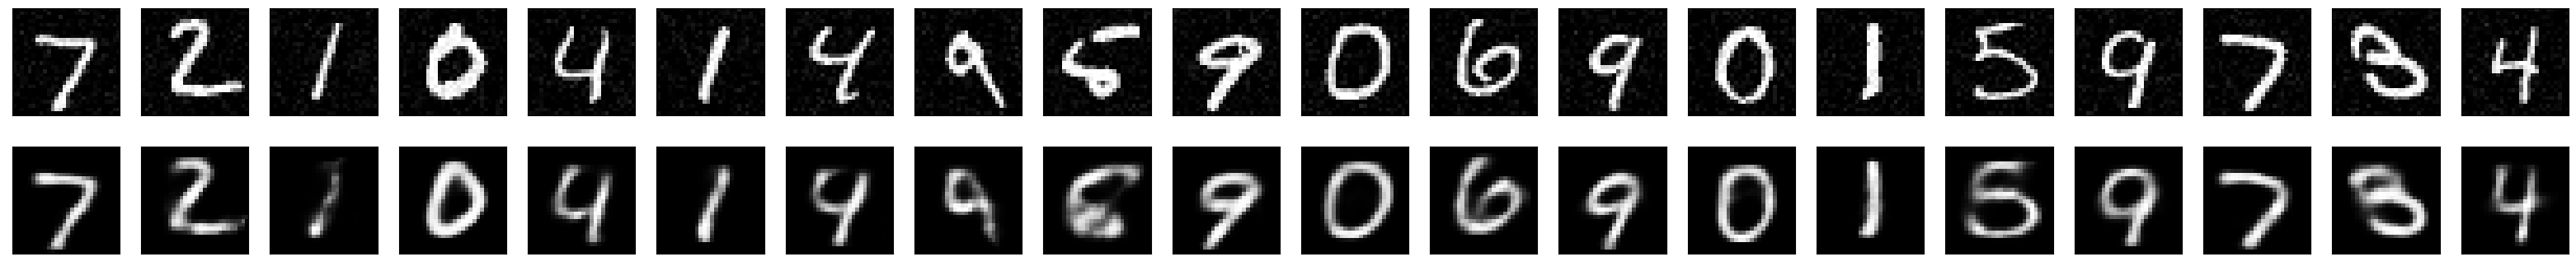

In [46]:
n = 20
plt.figure(figsize=(40, 4))
for i in range(n):
    #Display noisy image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(noisy_xtest[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #Display reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


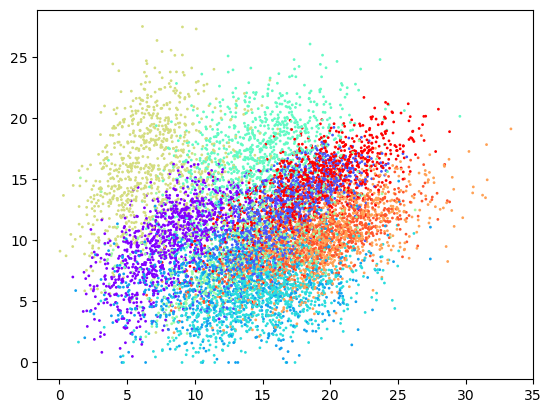

In [47]:
plt.scatter(encoded_imgs[:,1], encoded_imgs[:,3], s=1, c=ytest, cmap='rainbow')


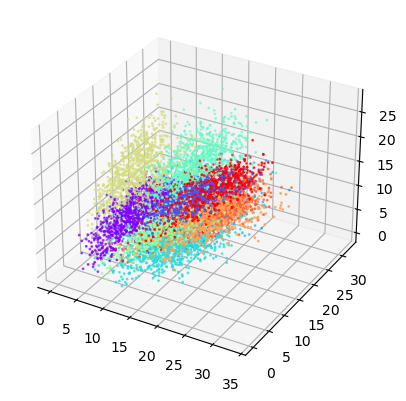

In [48]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(encoded_imgs[:,1], encoded_imgs[:,2], encoded_imgs[:,3], c=ytest, cmap='rainbow', s=1)


In [57]:
from keras.losses import MeanSquaredError

#Predict reconstructed images from noisy_xtest and name it deciphered_imgs
deciphered_imgs = autoencoder.predict(noisy_xtest)

#Compute MSE between noisy_xtest and reconstructed images
MSE = MeanSquaredError()
loss = MSE(noisy_xtest, deciphered_imgs).numpy()

#Print MSE
print("Reconstruction loss - noisy_xtest:", loss)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step
Reconstruction loss - noisy_xtest: 0.02496022


In [58]:
print("""The autoencoder model performed fairly well when it came to reconstructing the images derived from the noisy inputs. It had a reconstruction loss of 0.02496022.""")

The autoencoder model performed fairly well when it came to reconstructing the images derived from the noisy inputs. It had a reconstruction loss of 0.02496022.
